In [14]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
name='zipf_4pm__final_8'
df = pd.read_csv(name+'.csv') 

COMMIT_ALG     ONE_PC      TWO_PC
ZIPF_THETA                       
0.00        33394.715  23082.6350
0.60        29359.810  24840.3900
0.80        19029.755  13869.0550
0.90         6233.925   4094.5780
0.99         3153.110    964.8695
1.10         1338.094    225.6212


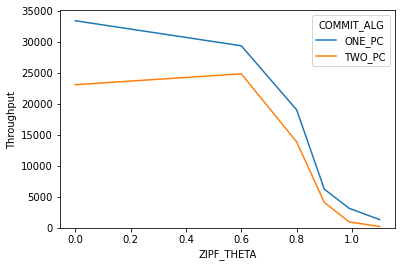

In [15]:
grouped = df.groupby(['COMMIT_ALG', 'ZIPF_THETA'])
newdf = grouped['sum_throughput'].mean().reset_index()
newdf = newdf.pivot(index='ZIPF_THETA', columns='COMMIT_ALG', values='sum_throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
plot.set_xlabel("ZIPF_THETA")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
# fig.savefig(name+".png")


COMMIT_ALG      TWO_PC
ZIPF_THETA            
0.60        21845.3200
0.80        10536.1980
0.90         2446.9900
0.99          640.7877


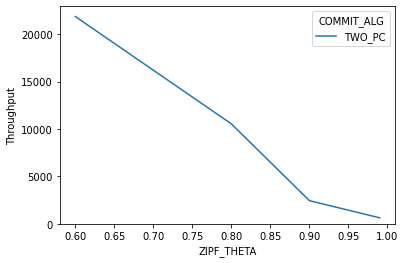

In [13]:
grouped = df.groupby(['COMMIT_ALG', 'ZIPF_THETA'])
newdf = grouped['sum_throughput'].mean().reset_index()
newdf = newdf.pivot(index='ZIPF_THETA', columns='COMMIT_ALG', values='sum_throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
plot.set_xlabel("ZIPF_THETA")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
# fig.savefig(name+".png")


COMMIT_ALG     ONE_PC
ZIPF_THETA           
0.00        32422.750
0.60        33136.720
0.80        18782.800
0.90         6908.780
0.99         3111.113
1.10         1363.372


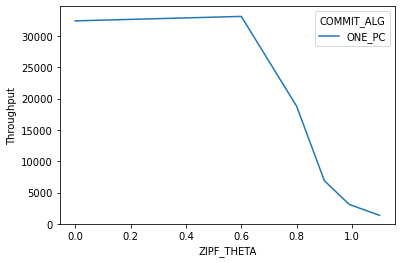

In [11]:
grouped = df.groupby(['COMMIT_ALG', 'ZIPF_THETA'])
newdf = grouped['sum_throughput'].mean().reset_index()
newdf = newdf.pivot(index='ZIPF_THETA', columns='COMMIT_ALG', values='sum_throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
plot.set_xlabel("ZIPF_THETA")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
# fig.savefig(name+".png")


COMMIT_ALG       ONE_PC    TWO_PC
NETWORK_DELAY                    
0              0.003319  0.003672
1              0.004494  0.005451
2              0.006312  0.007733
3              0.008544  0.010555
4              0.010306  0.012566
5              0.012299  0.015048


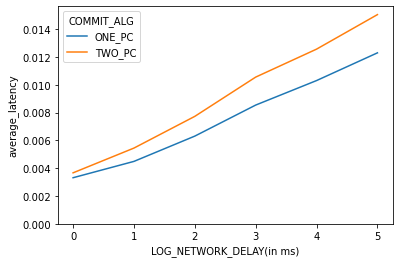

In [4]:
grouped = df.groupby(['COMMIT_ALG', 'NETWORK_DELAY'])
newdf = grouped['average_latency'].mean().reset_index()
newdf = newdf.pivot(index='NETWORK_DELAY', columns='COMMIT_ALG', values='average_latency')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("average_latency")
plot.set_xlabel("LOG_NETWORK_DELAY(in ms)")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
# fig.savefig(name+".png")


COMMIT_ALG        ONE_PC     TWO_PC
NETWORK_DELAY                      
0               2854.574   2581.066
1               4000.006   3849.430
2               5577.098   5461.516
3               7353.828   7333.428
4               8951.256   8836.332
5              10552.300  10489.080


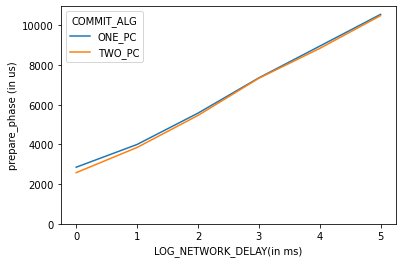

In [5]:
grouped = df.groupby(['COMMIT_ALG', 'NETWORK_DELAY'])
newdf = grouped['prepare_phase (in us)'].mean().reset_index()
newdf = newdf.pivot(index='NETWORK_DELAY', columns='COMMIT_ALG', values='prepare_phase (in us)')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("prepare_phase (in us)")
plot.set_xlabel("LOG_NETWORK_DELAY(in ms)")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
# fig.savefig(name+".png")


COMMIT_ALG       ONE_PC     TWO_PC
NETWORK_DELAY                     
0              8.019134   724.1874
1              7.612866  1072.9760
2              7.427822  1442.0800
3              6.573482  1959.6140
4              7.313322  2256.7320
5              8.417292  2702.2280


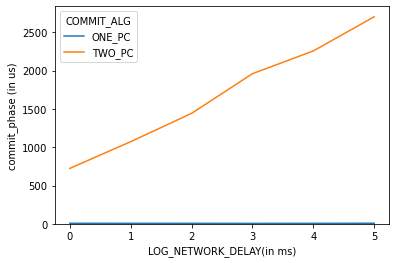

In [6]:
grouped = df.groupby(['COMMIT_ALG', 'NETWORK_DELAY'])
newdf = grouped['commit_phase (in us)'].mean().reset_index()
newdf = newdf.pivot(index='NETWORK_DELAY', columns='COMMIT_ALG', values='commit_phase (in us)')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("commit_phase (in us)")
plot.set_xlabel("LOG_NETWORK_DELAY(in ms)")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
# fig.savefig(name+".png")


In [9]:
latency = grouped['average_latency', 'average_local_latency', 'average_distributed_latency'].mean().reset_index()
result = latency[latency['NETWORK_DELAY'] == 0.1]

<ipython-input-9-6e4f263a5f2d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['average_latency', 'average_local_latency', 'average_distributed_latency'].mean().reset_index()


KeyError: 'PERC_REMOTE'

  COMMIT_ALG  PERC_REMOTE  average_latency  average_local_latency  \
0     ONE_PC          0.1         0.003349               0.001010   
1     TWO_PC          0.1         0.004257               0.000928   

   average_distributed_latency  
0                     0.005194  
1                     0.006806  


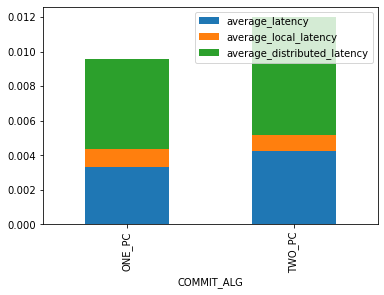

In [4]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig(name+"_latency.png")

In [4]:
latency = grouped['execute_phase (in us)', 'prepare_phase (in us)','commit_phase (in us)', 'abort (in us)', 'total_log_yes (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-4-b1a898da6d14>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase (in us)','commit_phase (in us)', 'abort (in us)', 'total_log_yes (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  execute_phase (in us)  prepare_phase (in us)  \
0     ONE_PC          0.1               477.3763               2863.588   
1     TWO_PC          0.1               434.9198               2725.739   

   commit_phase (in us)  abort (in us)  total_log_yes (in us)  
0              7.379099       0.905214               2290.176  
1           1095.333000       1.266725               2109.840  


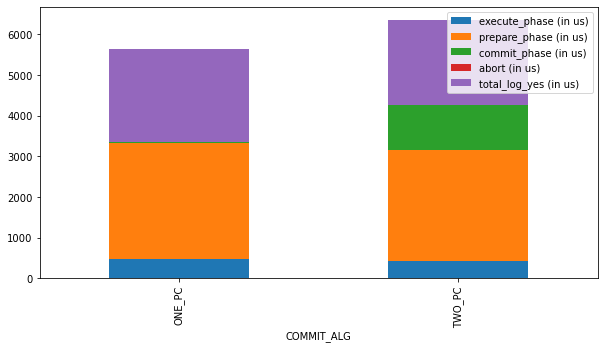

In [5]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
fig.savefig(name+"_phase_breakdown.png")

In [7]:
latency = grouped['execute_phase_local (in us)', 'prepare_phase_local (in us)','commit_phase_local (in us)', 'abort_local (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-7-9b700c6480bd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase_local (in us)', 'prepare_phase_local (in us)','commit_phase_local (in us)', 'abort_local (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  execute_phase_local (in us)  \
0     ONE_PC          0.1                    135.03248   
1     TWO_PC          0.1                    164.87944   

   prepare_phase_local (in us)  commit_phase_local (in us)  \
0                     2240.713                    6.387121   
1                     2069.206                    5.651507   

   abort_local (in us)  
0             1.522357  
1             0.783243  


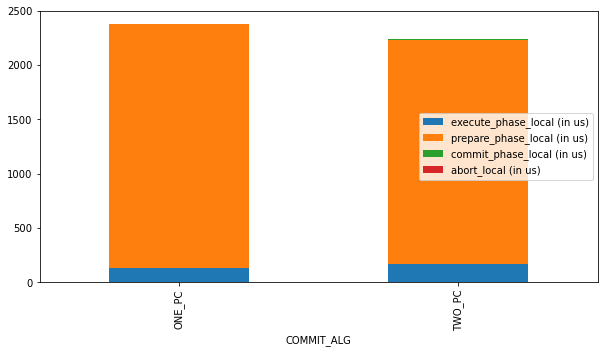

In [8]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
fig.savefig(name+"_phase_breakdown.png")

In [9]:
latency = grouped['execute_phase_dist_readonly (in us)', 'prepare_phase_dist_readonly (in us)','commit_phase_dist_readonly (in us)', 'abort_dist_readonly (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-9-1145704f247d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase_dist_readonly (in us)', 'prepare_phase_dist_readonly (in us)','commit_phase_dist_readonly (in us)', 'abort_dist_readonly (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  execute_phase_dist_readonly (in us)  \
0     ONE_PC          0.1                             552.6265   
1     TWO_PC          0.1                             497.4649   

   prepare_phase_dist_readonly (in us)  commit_phase_dist_readonly (in us)  \
0                             3022.327                            6.117590   
1                             2852.544                            5.632694   

   abort_dist_readonly (in us)  
0                            0  
1                            0  


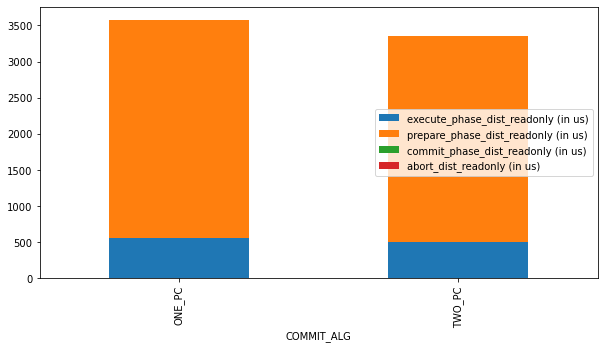

In [10]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
fig.savefig(name+"_phase_breakdown.png")

In [11]:
latency = grouped['execute_phase_dist_write (in us)', 'prepare_phase_dist_write (in us)','commit_phase_dist_write (in us)', 'abort_dist_write (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-11-5dc6a36c019c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase_dist_write (in us)', 'prepare_phase_dist_write (in us)','commit_phase_dist_write (in us)', 'abort_dist_write (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  execute_phase_dist_write (in us)  \
0     ONE_PC          0.1                          557.6530   
1     TWO_PC          0.1                          492.2892   

   prepare_phase_dist_write (in us)  commit_phase_dist_write (in us)  \
0                          2999.671                         8.283798   
1                          2876.927                      1929.498000   

   abort_dist_write (in us)  
0                  1.110255  
1                  1.989859  


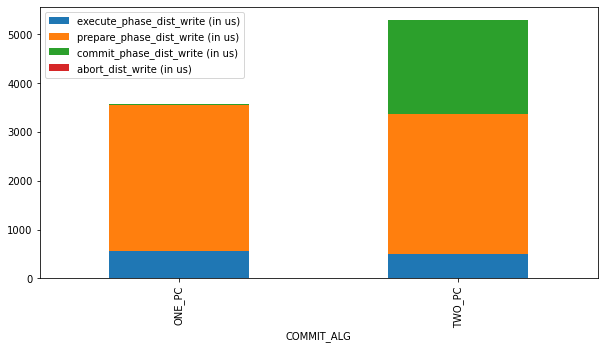

In [12]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
fig.savefig(name+"_phase_breakdown.png")

In [13]:
latency = grouped['network_log (in us)', 'total_log_yes (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-13-f9d8dc48aa43>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['network_log (in us)', 'total_log_yes (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  network_log (in us)  total_log_yes (in us)
0     ONE_PC          0.1            1191.6733               2290.176
1     TWO_PC          0.1            1920.6500               2109.840


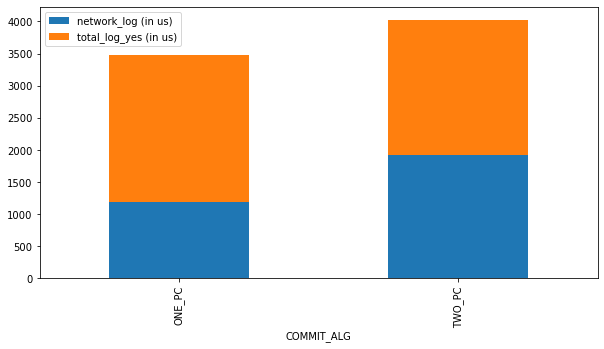

In [14]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
# fig.savefig(name+"_phase_breakdown.png")

In [15]:
latency = grouped['network_log (in us)', 'total_log_yes (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-15-f9d8dc48aa43>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['network_log (in us)', 'total_log_yes (in us)'].mean().reset_index()


  COMMIT_ALG  PERC_REMOTE  network_log (in us)  total_log_yes (in us)
0     ONE_PC          0.1            1191.6733               2290.176
1     TWO_PC          0.1            1920.6500               2109.840


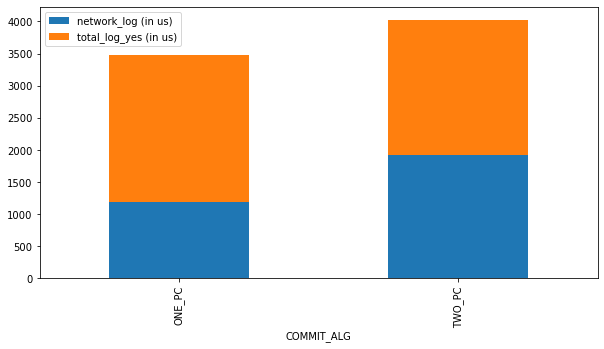

In [16]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
# fig.savefig(name+"_phase_breakdown.png")